#### Task 4.10 Part 1

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Creating string of project folder.

path = r'/Users/nautis1/data_project/09-2025-Instacart-Basket-Analysis/Instacart Basket Analysis'

In [3]:
# importing dataframe
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_orders_products_merged.pkl'))

In [4]:
#reading the first 5 rows
df_merged.head()
df_merged.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'customer_first_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_label',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag', 'median_days',
       'regularity_flag', 'first_name', 'surname', 'state', 'age',
       'num_of_dependents', 'fam_status', 'income'],
      dtype='object')

### Step 2: PII Risk Check
In this step, I examined the columns in the dataset to identify any potential Personally Identifiable Information (PII). I decided to delete first_name and surname columns as it gives the identification of the user

In [5]:
#drop the PII columns
df_merged.drop(columns = ['first_name', 'surname'], inplace= True)

In [6]:
#check if the column is deleted
df_merged.columns


Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'customer_first_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_label',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag', 'median_days',
       'regularity_flag', 'state', 'age', 'num_of_dependents', 'fam_status',
       'income'],
      dtype='object')

In [7]:
#check the shape of df
df_merged.shape

(30629741, 31)

## Step 3a - Create a regional segmentation of the data. 

In [8]:
# Creating a dictionary mapping the states to regions. 

state_to_region = {
    # Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast', 'Massachusetts': 'Northeast', 
    'Rhode Island': 'Northeast', 'Connecticut': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',
    
    # Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 
    'Iowa': 'Midwest', 'Missouri': 'Midwest',
    
    # South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South', 'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    
    # West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West', 'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 'New Mexico': 'West',
    'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Hawaii': 'West'
}


In [9]:
# create a region column
df_merged['region'] = df_merged['state'].map(state_to_region)

# Checking results of mapping. 
df_merged[['state', 'region']]


,state,region
0,Minnesota,Midwest
1,Minnesota,Midwest
2,Vermont,Northeast
3,Wisconsin,Midwest
4,Wisconsin,Midwest
...,...,...
30629736,Rhode Island,Northeast
30629737,West Virginia,South
30629738,Michigan,Midwest
30629739,Michigan,Midwest


In [10]:
#check the shape of new df
df_merged.shape

(30629741, 32)

## Step 3b - Determine whether there is a difference in spending habits between the different U.S. regions. 

In [11]:
# Creating a crosstab of the 'region' column with the 'spending_flag' column to see how spending differs across the 4 regions. 

crosstab_regional_spending = pd.crosstab(df_merged['region'], df_merged['spending_flag'], dropna= False)

# Checking crosstab.

crosstab_regional_spending

spending_flag,High Spender,Low Spender
region,,
Midwest,149803,7027121
Northeast,101420,5320605
South,196523,10002459
West,147789,7684021


In [12]:
#count the spending flag
df_merged['spending_flag'].value_counts()

spending_flag
Low Spender     30034206
High Spender      595535
Name: count, dtype: int64

#### Most of the customers are low spenders

Text(0, 0.5, 'Count of Customers (in millions)')

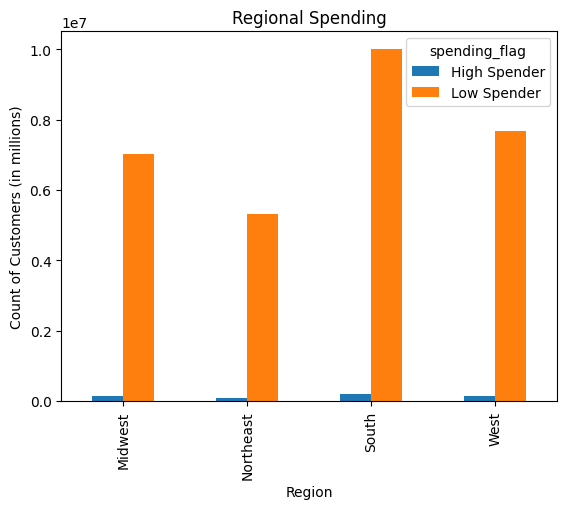

In [13]:
#create a bar chart for regional spending

bar_regional_spending = crosstab_regional_spending.plot.bar()

# Title 
plt.title ('Regional Spending')

#X label
plt.xlabel ('Region')

# Y-axis label is in scientific notation (1e7 is actually 10 million) so it is showing raw counts. 
plt.ylabel ('Count of Customers (in millions)')

#### There is no significant difference in spending habits across regions. All of the places have higher low spenders

In [14]:
# Exporting bar chart. 

bar_regional_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_spending.png'))

In [52]:
#find which region has highest loyalty score
# Creating a crosstab of the 'region' column with the 'spending_flag' column to see how spending differs across the 4 regions. 

crosstab_loyalty_score = pd.crosstab(df_merged['region'], df_merged['loyalty_flag'], dropna= False)

# Checking crosstab.

crosstab_loyalty_score

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2237237,1390677,3549010
Northeast,1753741,1042969,2625315
South,3205498,1958540,5034944
West,2510914,1509975,3810921


In [53]:
crosstab_loyalty_score.to_clipboard()

## Step 4 - Create an exclusion flag for low-activity customers. 


In [15]:
#create exclusion flag
df_merged.loc[df_merged['max_order'] < 5, 'exclusion_flag'] = True

df_merged.loc[df_merged['max_order'] >= 5, 'exclusion_flag'] = False


In [16]:
#get the count of exclusion_flag
df_merged['exclusion_flag'].value_counts()

exclusion_flag
False    29270938
True      1358803
Name: count, dtype: int64

In [17]:
#filter out low activity customers
df_new = df_merged.loc[df_merged['exclusion_flag'] == False]

In [18]:
#check the new filtered df
df_new.shape

(29270938, 33)

In [19]:
#export this new df
df_new.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_cust.pkl'))

## Steps 5- Creating customer profiling

In [20]:
df_new.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,spending_flag,median_days,regularity_flag,state,age,num_of_dependents,fam_status,income,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Low Spender,8.0,Frequent Customer,Minnesota,81,1,married,49620,Midwest,False
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Low Spender,8.0,Frequent Customer,Minnesota,81,1,married,49620,Midwest,False
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Low Spender,8.0,Frequent Customer,Vermont,66,2,married,158302,Northeast,False
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,Low Spender,11.0,Regular customer,Hawaii,51,2,married,57797,West,False
6,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,prior,12,3,...,Low Spender,6.0,Frequent Customer,Tennessee,65,0,divorced/widowed,44856,South,False


In [21]:
#customer profile variable using for loop
result = []
for index, value in df_new.iterrows():
    if value['num_of_dependents'] >= 2 and value['income'] > 120000:
         result.append('Parent, High Income')    
    elif value['num_of_dependents'] >= 2:
        result.append('Parent, Low/Med Income')  
    elif value['num_of_dependents'] == 0 and value['age'] < 35:
        result.append('Young Adult, No Kids')
    elif value['num_of_dependents'] == 0 and value['age'] >= 35:
        result.append('Older Adult, No Kids')
    else:
         result.append('Other')        


# Apply to df_new
df_new['profile_segment'] = result

# Quick check
df_new['profile_segment'].value_counts(dropna=False)

/var/folders/m1/lrlcgb215jd9lw8n87qhqq_w0000gn/T/ipykernel_60750/3922457549.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['profile_segment'] = result


profile_segment
Parent, Low/Med Income    10319151
Other                      7301678
Older Adult, No Kids       5380339
Parent, High Income        4337589
Young Adult, No Kids       1932181
Name: count, dtype: int64

## Step 6: Visualization for Distribution of profiles

In [28]:
# Prepare data
profile_counts = df_new['profile_segment'].value_counts(dropna=False)

profile_counts

profile_segment
Parent, Low/Med Income    10319151
Other                      7301678
Older Adult, No Kids       5380339
Parent, High Income        4337589
Young Adult, No Kids       1932181
Name: count, dtype: int64

Text(0, 0.5, 'Number of Customers (in millions)')

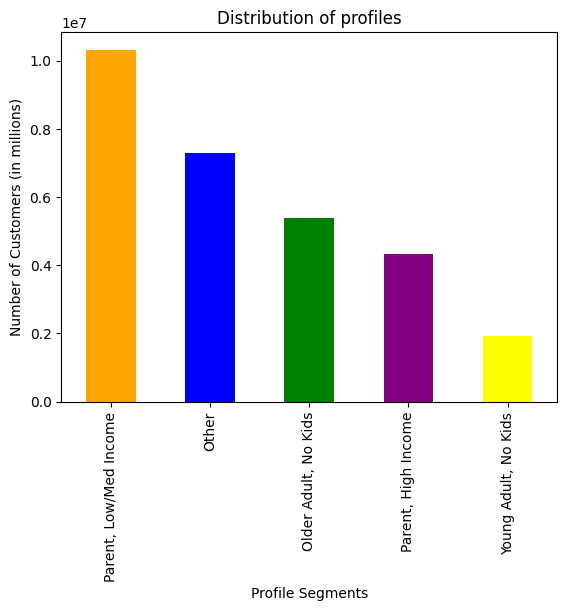

In [31]:
#create a bar chart for distribution of profiles

bar_profile_counts = profile_counts.plot.bar(color=['orange', 'blue', 'green', 'purple', 'yellow'])

# Title 
plt.title ('Distribution of profiles')

#X label
plt.xlabel ('Profile Segments')

# Y-axis label is in scientific notation (1e7 is actually 10 million) so it is showing raw counts. 
plt.ylabel ('Number of Customers (in millions)')

In [32]:
#Export barchart
bar_profile_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_distribution.png'))

## Step 7: The max, mean, and min variables on a customer-profile level

In [34]:
# get descriptive statistics for customer spending across categories
df_new.groupby(['profile_segment']).agg({'prices': ['mean', 'min', 'max']})

prices              
                             mean  min      max
profile_segment                                
Older Adult, No Kids    12.085373  1.0  99999.0
Other                   11.477627  1.0  99999.0
Parent, High Income     20.319064  1.0  99999.0
Parent, Low/Med Income   8.410483  1.0  99999.0
Young Adult, No Kids    12.233665  1.0  99999.0

## Step 8: Customer profile across regions

In [44]:
#cross tab to get the profile segment distributions across regions
cross_region = pd.crosstab(df_new['profile_segment'], df_new['region'], dropna = False)
cross_region

region,Midwest,Northeast,South,West
profile_segment,,,,
"Older Adult, No Kids",1288838,921001,1783237,1387263
Other,1746127,1303728,2397449,1854374
"Parent, High Income",1029378,780153,1426142,1101916
"Parent, Low/Med Income",2357560,1814205,3490216,2657170
"Young Adult, No Kids",437952,358957,649886,485386


Text(0, 0.5, 'Number of Customers (in millions)')

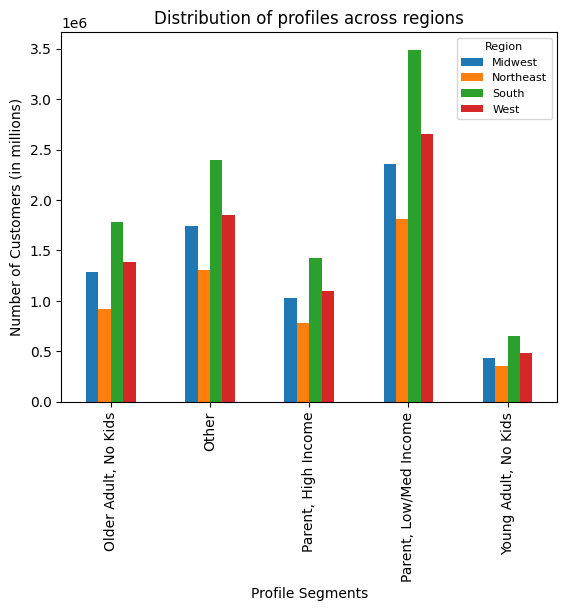

In [45]:
#create a bar chart for distribution of profiles

bar_cross_region = cross_region.plot.bar()

# Title 
plt.title ('Distribution of profiles across regions')

#X label
plt.xlabel ('Profile Segments')

plt.legend(title='Region', title_fontsize=8, fontsize=8, loc='upper right')

# Y-axis label is in scientific notation (1e7 is actually 10 million) so it is showing raw counts. 
plt.ylabel ('Number of Customers (in millions)')


In [46]:
#Export barchart
bar_cross_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_distribution_across_regions.png'))

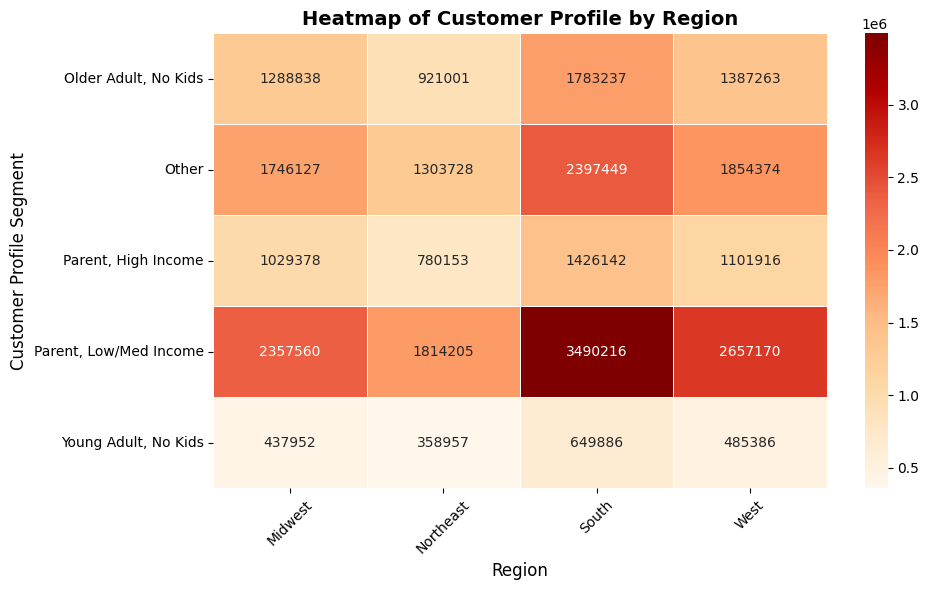

In [49]:
# Create Heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(cross_region, annot=True, fmt='d', cmap='OrRd', linewidths=.5)

plt.title('Heatmap of Customer Profile by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Customer Profile Segment', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

#### Insights from the visualizations

1. The heatmap visualizes the distribution of customer profile segments across different U.S. regions.
2. The South has the highest number of customers in the "Parent, High Income" category.
3. The West shows a balanced distribution, especially in the "Young Adult, No Kids" group.
4. The Midwest appears to have relatively fewer "High Income" customers, suggesting a potential opportunity for targeting.
5. The Northeast has a moderate number of "Other" profiles, which may require further segmentation.
6. This information can be useful for tailoring marketing strategies and customer outreach based on regional characteristics

In [51]:
#Export heatmap
heatmap.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat_map_profile_distribution_across_regions.png'))